In [5]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/content/bank.csv")
df.info()
object_columns = df.select_dtypes(include="object").columns
print("Object columns:", object_columns)
for col in object_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())
null_values=df.isnull().sum()
print("\nNull values:",null_values)
bank_numeric = df.drop(columns=object_columns)

bank_numeric.to_csv("/content/drive/MyDrive/content/bank.csv", index=False)
bank_numeric
bn = pd.read_csv("/content/drive/MyDrive/content/bank.csv")
bn.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Object columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
    

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df = pd.read_csv("/content/drive/MyDrive/content/medical_students_dataset.csv")
df.info()
df.isnull().sum()
df["Age"] = df["Age"].fillna(df["Age"].median())     # If outliers exist
df["Height"] = df["Height"].fillna(df["Height"].mean())  # If normally distributed
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df.duplicated().sum()     # how many duplicates?
df = df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [7]:
import pandas as pd
titanic = pd.read_csv("/content/drive/MyDrive/content/Titanic-Dataset.csv")
titanic.head()
subset = titanic[["Name", "Pclass", "Sex", "Age", "Fare", "Survived"]]
subset_1st_class = subset[subset["Pclass"] == 1]
subset_1st_class
fare_mean = subset_1st_class["Fare"].mean()
fare_median = subset_1st_class["Fare"].median()
fare_max = subset_1st_class["Fare"].max()
fare_min = subset_1st_class["Fare"].min()

fare_mean, fare_median, fare_max, fare_min
print("Mean Fare:", fare_mean)
print("Median Fare:", fare_median)
print("Maximum Fare:", fare_max)
print("Minimum Fare:", fare_min)
subset_1st_class["Age"].isnull().sum()
subset_1st_class = subset_1st_class.dropna(subset=["Age"])

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


In [8]:
embarked_dummies = pd.get_dummies(titanic["Embarked"], prefix="Embarked")

titanic2 = pd.concat([titanic, embarked_dummies], axis=1)

titanic2 = titanic2.drop(columns=["Embarked"])

titanic2.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


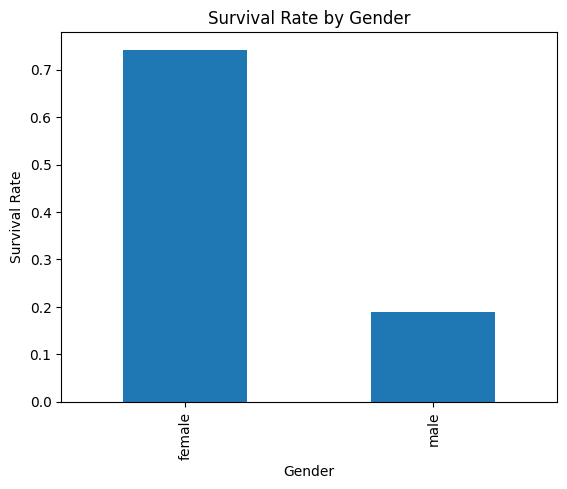

In [9]:
import matplotlib.pyplot as plt

titanic.groupby("Sex")["Survived"].mean().plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender")
plt.show()


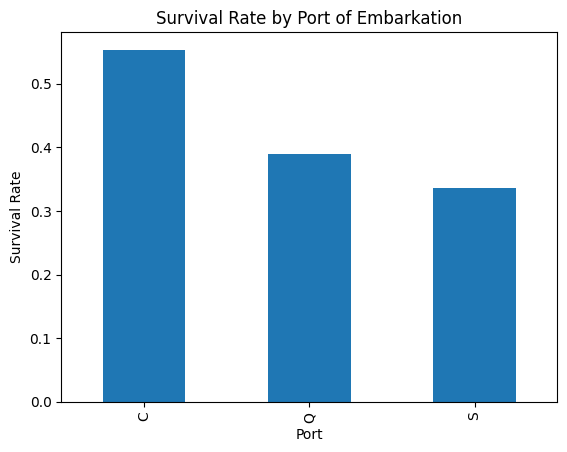

In [10]:
titanic.groupby("Embarked")["Survived"].mean().plot(kind="bar")
plt.xlabel("Port")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Port of Embarkation")
plt.show()